In [1]:
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
from utils import customJpegCompressor


In [2]:
data_folder = '../data/'
pictures = os.listdir(data_folder)

In [3]:
def mean_block(slices):
    sum = np.zeros(slices[0].shape)
    for block in slices:
        sum += block
    return sum / len(slices)

def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

In [4]:
all_slices = []
all_dct_10 = []
all_dct_50 = []
all_dct_90 = []

for pic in pictures:
    img = cv2.imread(data_folder + pic, 0)
    if img.shape[0] % 8 != 0 or img.shape[1] % 8 :
        break

    all_slices += customJpegCompressor.slice_image(img)
    compress10 = customJpegCompressor.compress(img, 'Q10')
    compress90 = customJpegCompressor.compress(img, 'Q90')


    all_dct_10 += compress10
    all_dct_90 += compress90

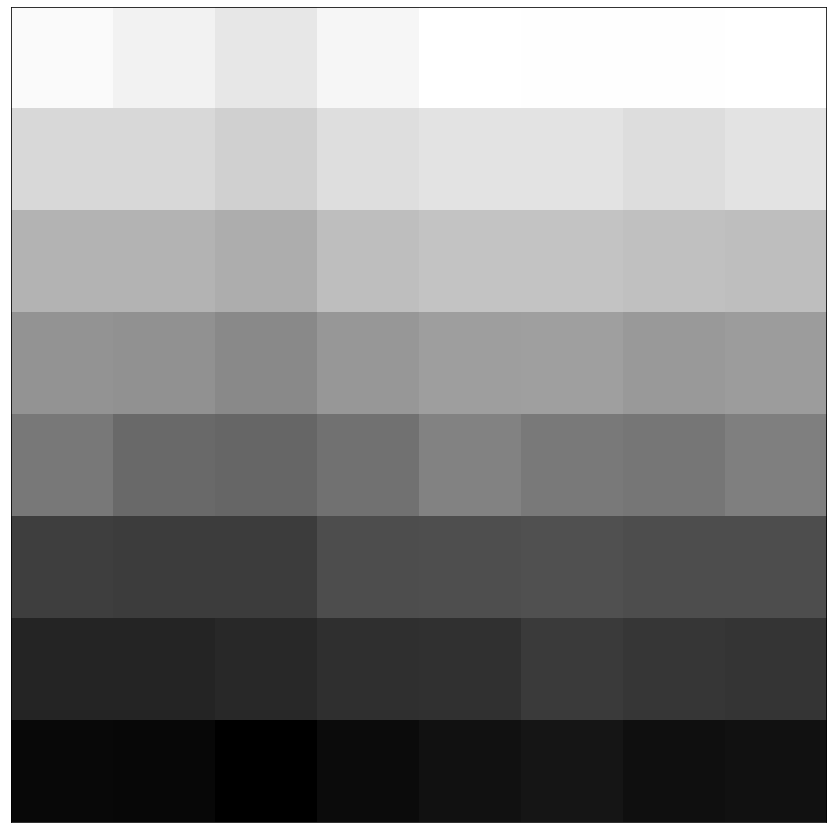

In [5]:
mean_slice = mean_block(all_slices)
showImage(mean_slice)

In [6]:
mean_dct_10 = mean_block(all_dct_10)
mean_dct_90 = mean_block(all_dct_90)

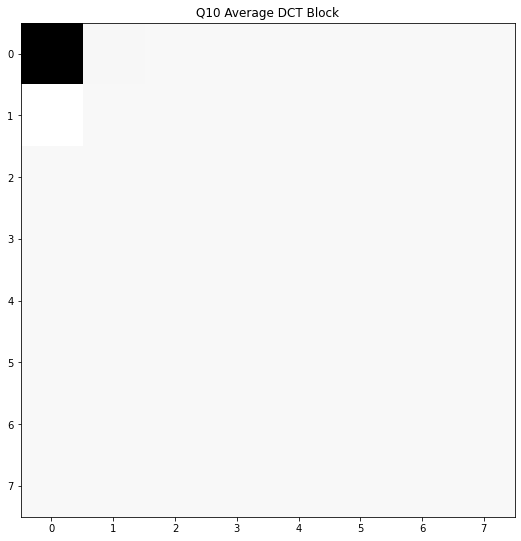

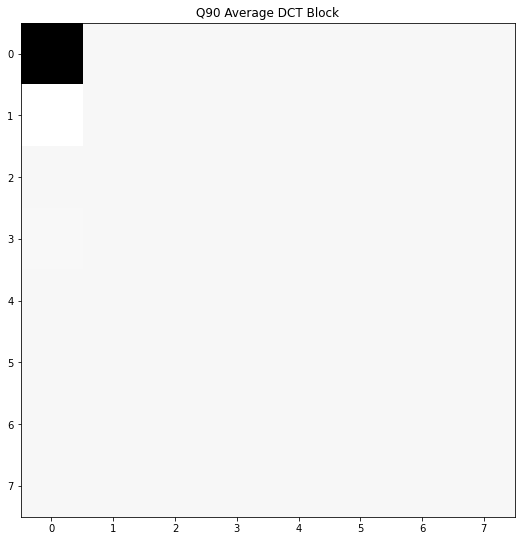

In [7]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 1, 1)
plt.imshow(mean_dct_10, cmap='gray')
plt.title("Q10 Average DCT Block")


plt.figure(figsize=(30, 20))
plt.subplot(2, 1, 1)
plt.imshow(mean_dct_90, cmap='gray')
plt.title("Q90 Average DCT Block")

plt.show()

